## 4. 種々の確率分布関数と乱数

必要なライブラリの読み込み

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

### 4.1 正規分布（Gauss分布）

- "np.random.randn(N)"を用いて，平均$\langle R\rangle=0$，分散$\sigma^2=1$の正規分布に従う乱数$R_i$を$N$個発生する．

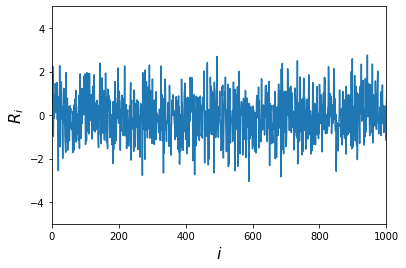

In [2]:
N = 100000                           # 発生する乱数の数
std = 1.0                            # 発生する乱数の標準偏差
ave = 0.0                            # 発生する乱数の平均値
np.random.seed(0)                    # 乱数の初期化
R = std*np.random.randn(N)+ave       # 平均=ave，標準偏差=stdの正規分布に従う乱数をN個発生させ，Rに格納
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$R_i$', fontsize=16)
plt.xlim(0,1000)
plt.ylim(-5,5)
plt.plot(R)                          # R_i vs. i (i=1,2,...,N)
plt.show()

- 乱数$R_i$の分布が正規分布
$$
P(R)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(R-\langle R \rangle)^2}{2\sigma^2}\right]
$$
に一致することを確認する．

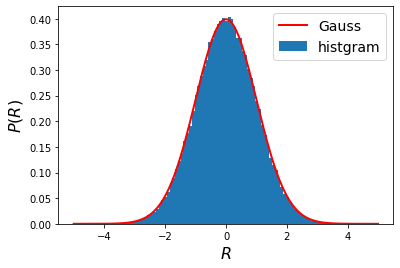

In [3]:
plt.hist(R, bins=100,density=True)    # Rに格納された乱数の分布を100本の棒グラフにする．さらに総面積が1になるよう規格化
x = np.arange(-5, 5, 0.01)           # -5から5の範囲を間隔0.01で刻み，配列xに保存
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2) # 配列xと同じ数だけ正規分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='r')      # x vs. yを線幅2の赤い線で描く
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P(R)$', fontsize=16)
plt.legend([r'Gauss',r'histgram'], fontsize=14)

plt.show()                           # 上記のグラフをまとめて1つの図に出力

- 乱数$R_i$の自己相関関数
$$
C(k)=\frac{1}{N}\sum_{i=1}^{N} (R_i - \langle R\rangle)(R_{i+k}-\langle R\rangle)
$$
を計算し，乱数間に相関がないことを確認する．

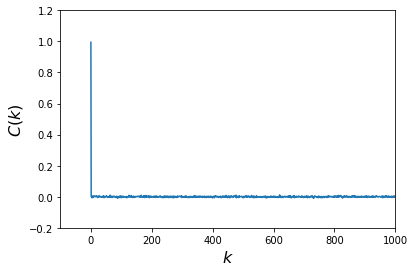

In [4]:
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N-1:]
corr = np.zeros(N)
corr=auto_correlate(R-ave)/N
plt.plot(corr)
plt.xlim(-100,1000)
plt.ylim(-0.2,1.2)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()

### 4.2. 二項分布

- "np.random.binomial(n=M, p=p, size=N)"を用いて，二項分布$P(R,M)$に従う乱数$R_i$を$N$個発生する．

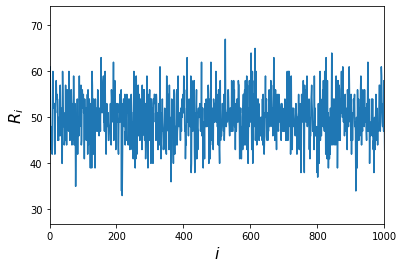

In [5]:
def binomial(n,m,p):
    comb = math.factorial(m) / (math.factorial(n) * math.factorial(m-n))
    prob = comb * p ** n * (1 - p) ** (m - n)
    return prob
p = 0.5                                               # １回の試行でPかQのどちらかが必ず起こる場合にPが起こる確率
M = 100                                               # 試行回数
N = 100000                                            # サンプル数
np.random.seed(0)                                     # 乱数の初期化
R=np.random.binomial(n=M, p=p, size=N)                # 乱数を用いてM回試行し，Pが起こった回数をRに保存（それをN回繰り返す）
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$R_i$', fontsize=16)
plt.xlim(0,1000)
#plt.ylim(-5,5)
plt.plot(R)
plt.show()

- 乱数$R_i$の分布が二項分布
$$
P(R;M)=\frac{M!}{R!(M-R)!}p^{R}(1-p)^{M-R}
$$
に一致することを確認する．

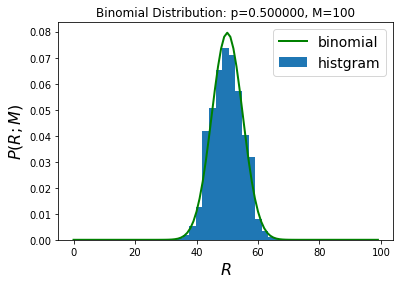

In [6]:
plt.hist(R, bins=20,density=True)                     # Rに格納された回数の分布を100本の棒グラフにする．さらに総面積が1になるよう規格化
x = np.arange(M)                                      # 0からMの範囲を間隔1で刻み，配列xに保存
y = np.zeros(M)                                       # 配列yの全要素を0に初期化
for i in range(M):
    y[i]=binomial(i,M,p)                              # 二項分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='g')                       # x vs. yを線幅2の赤い線で描く
plt.title(r'Binomial Distribution: p=%f, M=%i' % (p,M))
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P(R;M)$', fontsize=16)
plt.legend([r'binomial',r'histgram'], fontsize=14)
plt.show()                                             # 上記のグラフをまとめて1つの図に出力

- 乱数$R_i$の自己相関関数
$$
C(k)=\frac{1}{N}\sum_{i=1}^{N} (R_i - \langle R\rangle)(R_{i+k}-\langle R\rangle)
$$
を計算し，乱数間に相関がないことを確認する．

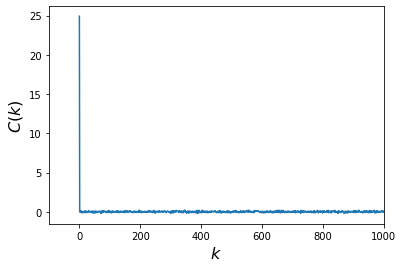

In [7]:
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[N-1:]
corr = np.zeros(N)
ave = M*p
corr=auto_correlate(R-ave)/N
plt.plot(corr)
plt.xlim(-100,1000)
#plt.ylim(-0.2,1.2)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()

### 4.3. 中心極限定理の一例（二項分布→正規分布）

- 試行回数$M$と確率$p$が十分に大きいとき，二項分布$P(R;M)$は平均$\langle R\rangle=Mp$，分散$\sigma^2=Mp(1-p)$の正規分布で近似できることを確認する．

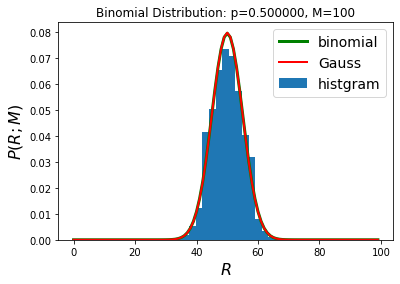

In [8]:
plt.hist(R, bins=20,density=True)                     # Rに格納された回数の分布を100本の棒グラフにする．さらに総面積が1になるよう規格化
x = np.arange(M)                                      # 0からMの範囲を間隔1で刻み，配列xに保存
y = np.zeros(M)                                       # 配列yの全要素を0に初期化
for i in range(M):
    y[i]=binomial(i,M,p)                              # 二項分布の理論値を配列yに保存
plt.plot(x, y, lw=3, color='g')                       # x vs. yを線幅2の赤い線で描く
plt.title(r'Binomial Distribution: p=%f, M=%i' % (p,M))
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P(R;M)$', fontsize=16)
std = np.sqrt(M*p*(1-p))                # 正規分布の標準偏差を二項分布に合うように設定
ave = p*M                               # 正規分布の平均値を二項分布に合うように設定
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2) # 配列xと同じ数だけ正規分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='r')         # x vs. yを線幅2の赤い線で描く
plt.legend([r'binomial',r'Gauss','histgram'], fontsize=14)
plt.show()                              # 上記のグラフをまとめて1つの図に出力

### 4.4. ランダムウォーク（酔歩）

- "np.random..choice([-1,1],M)"を用いて，+1か-1がそれぞれ50%の確率で出現する乱数$S_i$を$M$個発生する．

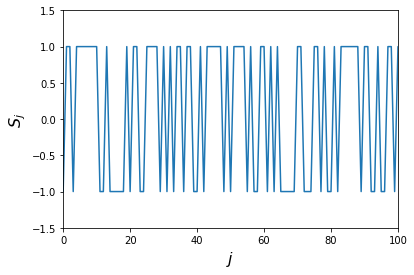

In [9]:
M = 10000                                # 酔歩の回数
np.random.seed(0)                        # 乱数の初期化
S = np.random.choice([-1,1],M)           # +1 or -1 をM個生成し，S(j)に保存 
plt.xlabel(r'$j$', fontsize=16)
plt.ylabel(r'$S_j$', fontsize=16)
plt.xlim(0,100)
plt.ylim(-1.5,1.5)
plt.plot(S)
plt.show()

- 乱数$S_i$の分布を確認する．

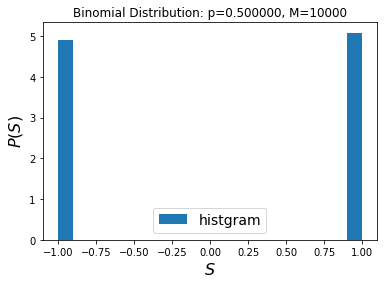

In [10]:
plt.hist(S, bins=20,density=True)         # Rに格納された乱数の分布を棒グラフにする．さらに総面積が1になるよう規格化
plt.xlabel(r'$S$', fontsize=16)
plt.ylabel(r'$P(S)$', fontsize=16)
plt.legend([r'histgram'], fontsize=14)
plt.title(r'Binomial Distribution: p=%f, M=%i' % (p,M))
plt.show()                               # 上記のグラフを出力

- 乱数$S_i$の自己相関関数
$$
C(k)=\frac{1}{N}\sum_{i=1}^{N} (S_i - \langle S\rangle)(S_{i+k}-\langle S\rangle)
$$
を計算し，乱数間に相関がないことを確認する．

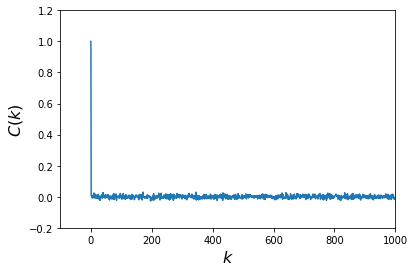

In [11]:
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
    return cor[M-1:]
ave = 0.0
corr = np.zeros(M)
corr=auto_correlate(S-ave)/M
plt.plot(corr)
plt.xlim(-100,1000)
plt.ylim(-0.2,1.2)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'$C(k)$', fontsize=16)
plt.show()

- 原点から出発し，$S_j=\pm1$のランダムウォーク（酔歩）を$M$回繰り返した後の位置を$R=\sum_{j=1}^{M}S_{j}$とする．この試行を独立に$L$回繰り返し，各回の結果を$R_i$とすると，その分布関数は平均$\langle R\rangle=0$，分散$\sigma^2=M$の正規分布に従うことを確認する．

$$
\tilde{P}(R;M)=P\left(I=\frac{M+R}{2};M\right)\frac{dI}{dR}\simeq
\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(R-\langle R\rangle)^2}{2\sigma^2}\right]
$$

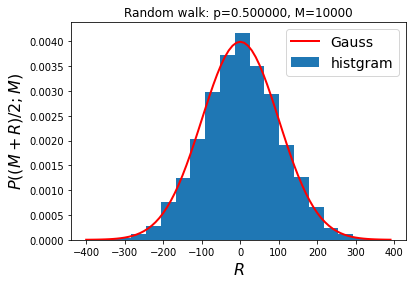

In [12]:
M = 10000                                # 発生する乱数の数
L = 10000                                # 独立なサンプル数
R = np.zeros(L)
np.random.seed(0)                        # 乱数の初期化
for i in range(L):                      # L回繰り返す
    step = np.random.choice([-1,1],M)    # +1/-1 をN個生成
    R[i] = np.sum(step)                  # i回目のサンプルについて，N個発生させた+1/-1の乱数S(j)の合計値のをR(i)に保存
plt.hist(R, bins=20,density=True)        # Rに格納された乱数の分布を20本の棒グラフにする．さらに総面積が1になるよう規格化
p=0.5
std = np.sqrt(4*M*p*(1-p))              # 正規分布の標準偏差を二項分布に合うように設定
ave = M*(p-1+(1-p))                     # 正規分布の平均値を二項分布に合うように設定
x = np.arange(-400,400,10)              # 配列xを作成
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2) # 配列xと同じ数だけ正規分布の理論値を配列yに保存
plt.plot(x, y, lw=2, color='r')         # x vs. yを線幅2の赤い線で描く
plt.xlabel(r'$R$', fontsize=16)
plt.ylabel(r'$P((M+R)/2;M)$', fontsize=16)
plt.legend([r'Gauss',r'histgram'], fontsize=14)
plt.title(r'Random walk: p=%f, M=%i' % (p,M))
plt.show()                              # 上記のグラフを出力

# 宿題 #4

以下の課題のうち，１つを選んで提出すること．

1. 一様乱数Xの平均値は$\langle X \rangle=0.5$，分散は$\sigma^2=1/12$である．$M$個の一様乱数の和$S_m=\sum_{i=1}^M X_i$を十分な個数発生させ，$S_m$の分布が平均$M\langle X \rangle$，分散$M\sigma^2$の正規分布で近似できることを示せ（中心極限定理の一例）．$M=10,10^3,10^5$の場合について確認せよ．

1. ランダムウォーク($S=\pm1$)を$M$回繰り返した後の位置$R$の分布関数は，本来は二項分布
$P(I\equiv(M+R)/2;M)$
で表されるが，$M$と$p$が大きい時には，平均$\langle R\rangle=0$，分散$\sigma^2=M$の正規分布で近似することができる（$M=10^4$については確認済み）．$M=10,10^3,10^5$の場合についてこれを確かめよ．